In [29]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
from tensorflow.keras.datasets import boston_housing

In [4]:
dataset = tf.keras.datasets.boston_housing.load_data()

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(dataset[0][0], columns=column_names)  # Assuming dataset[0] contains the training data
data['Price'] = dataset[0][1]  # Assuming dataset[0] contains the corresponding training targets

In [6]:
# data = pd.DataFrame(dataset[0][0], columns=feature_names)  # Assuming dataset[0] contains the training data
# data['Price'] = dataset[0][1]  # Assuming dataset[0] contains the corresponding training targets

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [8]:
# Determine the number of unique values in each column.
unique_counts = data.nunique()

In [9]:
# Print the unique value counts
print(unique_counts)

CRIM       404
ZN          25
INDUS       71
CHAS         2
NOX         79
RM         374
AGE        296
DIS        338
RAD          9
TAX         62
PTRATIO     46
B          286
LSTAT      371
Price      201
dtype: int64


In [10]:
# Check if there are any missing values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
# Data Scaling/Normalization
scaler = StandardScaler()
data[column_names] = scaler.fit_transform(data[column_names])

In [15]:
# Splitting into Training and Testing Sets
X = data[column_names].values
y = data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# # Split the data into features and target variable
# X = data.drop('Price', axis=1)
# y = data['Price']

In [17]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = 1 - (linear_regression_mse / y_test.var())

In [34]:
# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = 1 - (decision_tree_mse / y_test.var())

In [35]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = 1 - (random_forest_mse / y_test.var())

In [37]:
# Evaluate the models
print("Linear Regression R-squared:", linear_regression_r2)
print("Decision Tree R-squared:", decision_tree_r2)
print("Random Forest R-squared:", random_forest_r2)

Linear Regression R-squared: 0.6205189361087049
Decision Tree R-squared: 0.1842456274087112
Random Forest R-squared: 0.758404430721425


In [38]:

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)


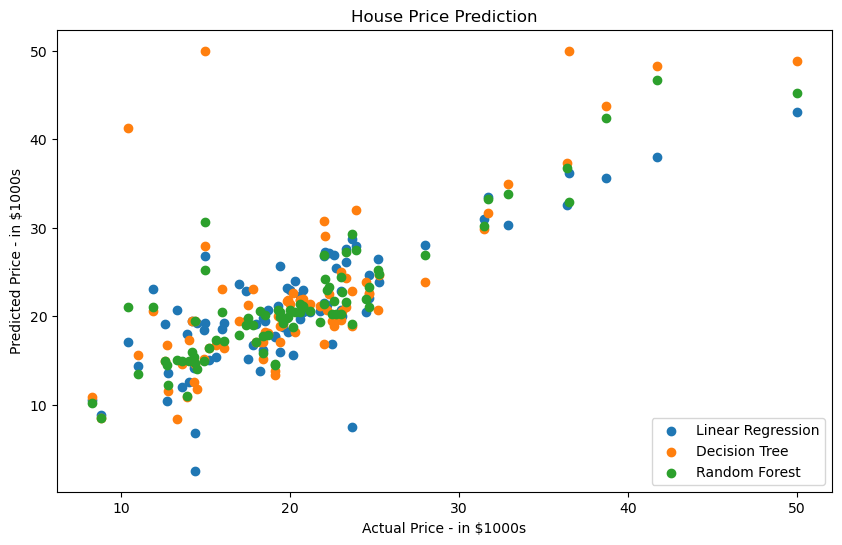

In [39]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, label='Linear Regression')
plt.scatter(y_test, decision_tree_predictions, label='Decision Tree')
plt.scatter(y_test, random_forest_predictions, label='Random Forest')
plt.xlabel('Actual Price - in $1000s')
plt.ylabel('Predicted Price - in $1000s')
plt.title('House Price Prediction')
plt.legend()
plt.show()

In [ ]:
#Random forest has least amount of outliers